In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [39]:
df=pd.read_csv('ushape.csv')

In [40]:
df.head()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [41]:
df.rename(columns={'3.159499363321345566e-02':'a','9.869877579082642072e-01':'b','0.000000000000000000e+00':'y'},inplace=True)

In [42]:
df.head()

,a,b,y
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

<Axes: xlabel='a', ylabel='b'>

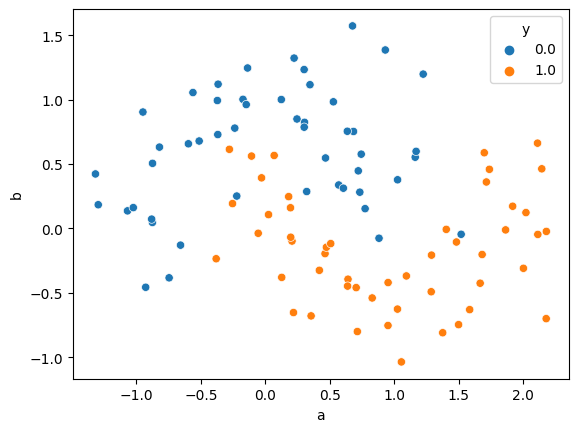

In [43]:
sns.scatterplot(x=df['a'],y=df['b'],hue=df['y'])

# model with default weight initialization 

In [44]:
model1=Sequential()
model1.add(Dense(256,activation='relu',input_dim=2))
model1.add(Dropout(.5))
model1.add(Dense(128,activation='relu'))
model1.add(Dropout(.5))
model1.add(Dense(1,activation='sigmoid'))
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 256)               768       
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 33793 (132.00 KB)
Trainable params: 33793 (132.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [46]:
history1=model1.fit(df.iloc[: ,0:2].values,df.iloc[: ,-1].values,validation_split=.2,epochs=100)

Epoch 1/100
3/3 [==============================] - 1s 129ms/step - loss: 0.6906 - accuracy: 0.5823 - val_loss: 0.6550 - val_accuracy: 0.9000
Epoch 2/100
3/3 [==============================] - 0s 27ms/step - loss: 0.6575 - accuracy: 0.6835 - val_loss: 0.6034 - val_accuracy: 0.8500
Epoch 3/100
3/3 [==============================] - 0s 28ms/step - loss: 0.6172 - accuracy: 0.8101 - val_loss: 0.5552 - val_accuracy: 0.8500
Epoch 4/100
3/3 [==============================] - 0s 27ms/step - loss: 0.5762 - accuracy: 0.8101 - val_loss: 0.5105 - val_accuracy: 0.8500
Epoch 5/100
3/3 [==============================] - 0s 27ms/step - loss: 0.5496 - accuracy: 0.7975 - val_loss: 0.4684 - val_accuracy: 0.8500
Epoch 6/100
3/3 [==============================] - 0s 28ms/step - loss: 0.5242 - accuracy: 0.7975 - val_loss: 0.4290 - val_accuracy: 0.8500
Epoch 7/100
3/3 [==============================] - 0s 34ms/step - loss: 0.4895 - accuracy: 0.7848 - val_loss: 0.3927 - val_accuracy: 0.8500
Epoch 8/100
3/3 [==

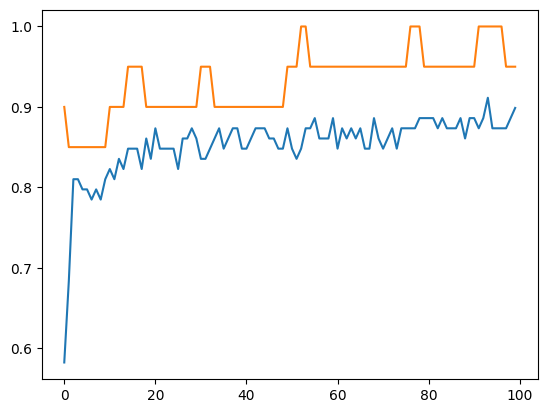

In [47]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.show()

# model with custom weights by programer

In [48]:
model2=Sequential()
model2.add(Dense(256,activation='relu',input_dim=2))
model2.add(Dropout(.5))
model2.add(Dense(128,activation='relu'))
model2.add(Dropout(.5))
model2.add(Dense(1,activation='sigmoid'))
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               768       
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 1)                 129       
                                                                 
Total params: 33793 (132.00 KB)
Trainable params: 33793 (132.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


getting the initial weights of our model2 

In [51]:
len(model2.get_weights())
initial_weights=model2.get_weights()

In [52]:
initial_weights[0]=np.zeros(initial_weights[0].shape)
initial_weights[1]=np.zeros(initial_weights[1].shape)
initial_weights[2]=np.zeros(initial_weights[2].shape)
initial_weights[3]=np.zeros(initial_weights[3].shape)
initial_weights[4]=np.zeros(initial_weights[4].shape)
initial_weights[5]=np.zeros(initial_weights[5].shape)

now setting these weights in our model2

In [53]:
model2.set_weights(initial_weights)

In [54]:
model2.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [55]:
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [56]:
history2=model2.fit(df.iloc[: ,0:2].values,df.iloc[: ,-1].values,validation_split=.2,epochs=100)

Epoch 1/100
3/3 [==============================] - 2s 136ms/step - loss: 0.6932 - accuracy: 0.4937 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 30ms/step - loss: 0.6932 - accuracy: 0.5063 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 32ms/step - loss: 0.6931 - accuracy: 0.5063 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 30ms/step - loss: 0.6931 - accuracy: 0.5063 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 28ms/step - loss: 0.6931 - accuracy: 0.5063 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 29ms/step - loss: 0.6932 - accuracy: 0.5063 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 28ms/step - loss: 0.6931 - accuracy: 0.5063 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/100
3/3 [==

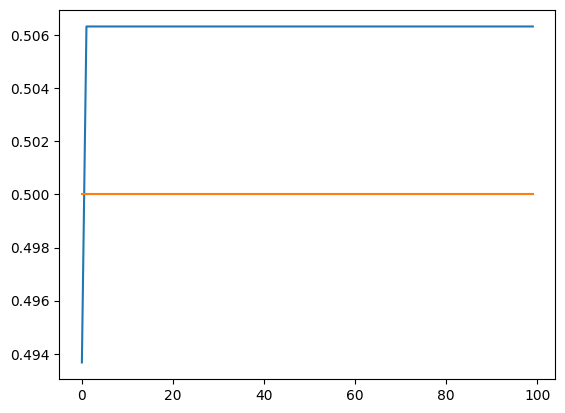

In [57]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])